In [2]:
import warnings
import pandas as pd

#seaborn setup
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

warnings.filterwarnings("ignore")

data = pd.read_csv('train.csv', index_col='PassengerId')

# Context

The dataset is synthetic but based on a real dataset (in this case, the actual Titanic data!) and generated using a CTGAN. The statistical properties of this dataset are very similar to the original Titanic dataset.

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|	0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||	
|Age|Age in years||	
|sibsp|	# of siblings / spouses aboard the Titanic||
|parch|	# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||	
|cabin|	Cabin number||	
|embarked|	Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

# Data quality assessment

### Data shape

In [4]:
data.shape

(100000, 11)

### If there is missing data ?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [6]:
data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

As we can see there is missed values in Age, Ticket, Fare, Cabin, Embarked columns.<br>
Ticket number and Cabin number don't provide any useful information, so for further analysis we can drop them.<br>
Missing values in Age column we can fill median or mean value.<br>
For missing values in Embarked we add most popular embarket place.<br>
Fare columns we can fill by mean value of pclass.


# Data exploration

### How many survived ?

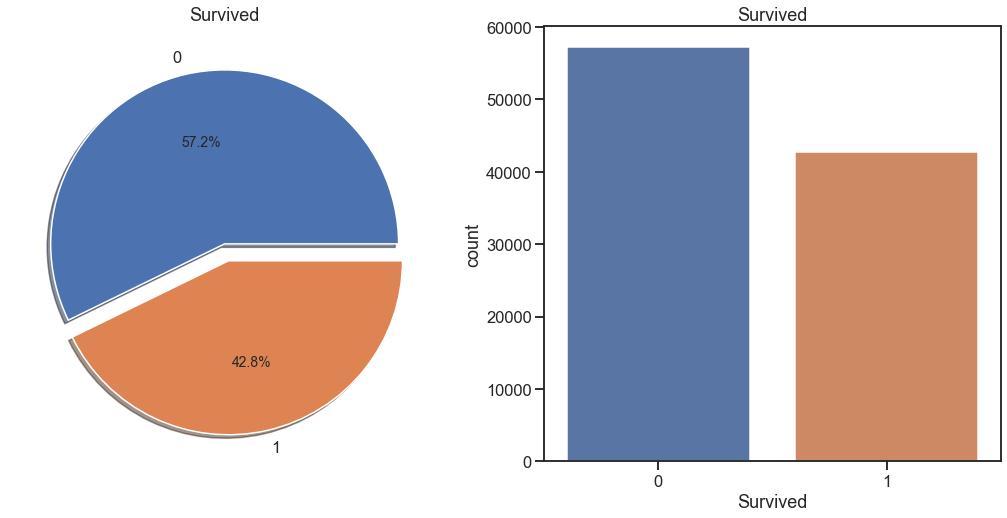

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<t>As we can see on plot above chance to survive <b>42.8%</b>. We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc

### SEX

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0           12660
        1           31226
male    0           44566
        1           11548
Name: Survived, dtype: int64

In [9]:
data.groupby(['Sex'])['Survived'].count()

Sex
female    43886
male      56114
Name: Survived, dtype: int64

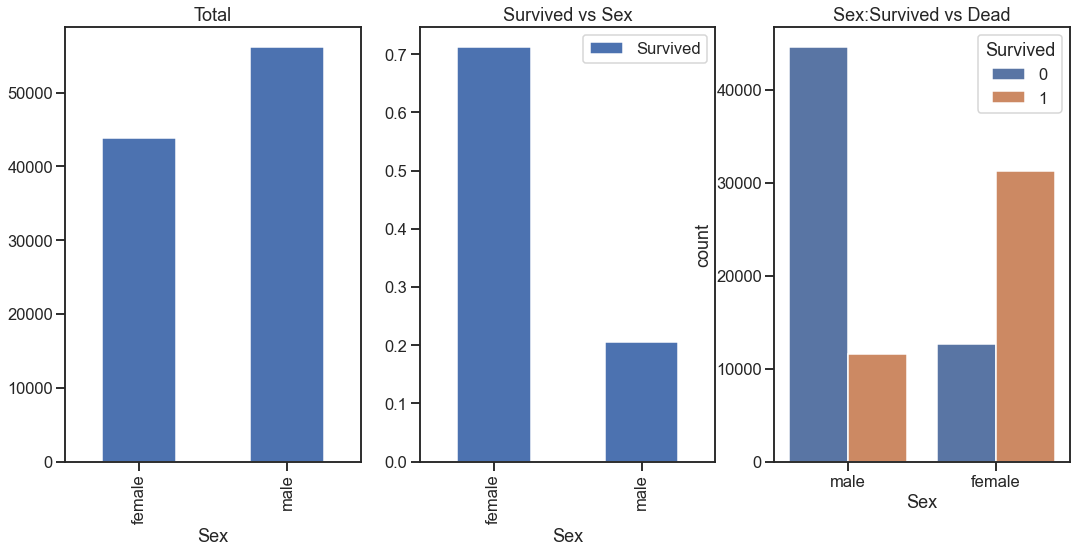

In [10]:
f,ax=plt.subplots(1,3,figsize=(18,8))
data.groupby(['Sex'])['Survived'].count().plot.bar(ax=ax[0])
ax[0].set_title('Total')
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[2])
ax[2].set_title('Sex:Survived vs Dead')

plt.show()

The number of men on the ship is more than the number of women. Still the number of women saved is more then twice the number of males saved. The survival rates for a women on the ship is around 70% while that for men in around 21-22%.

### Pclass

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


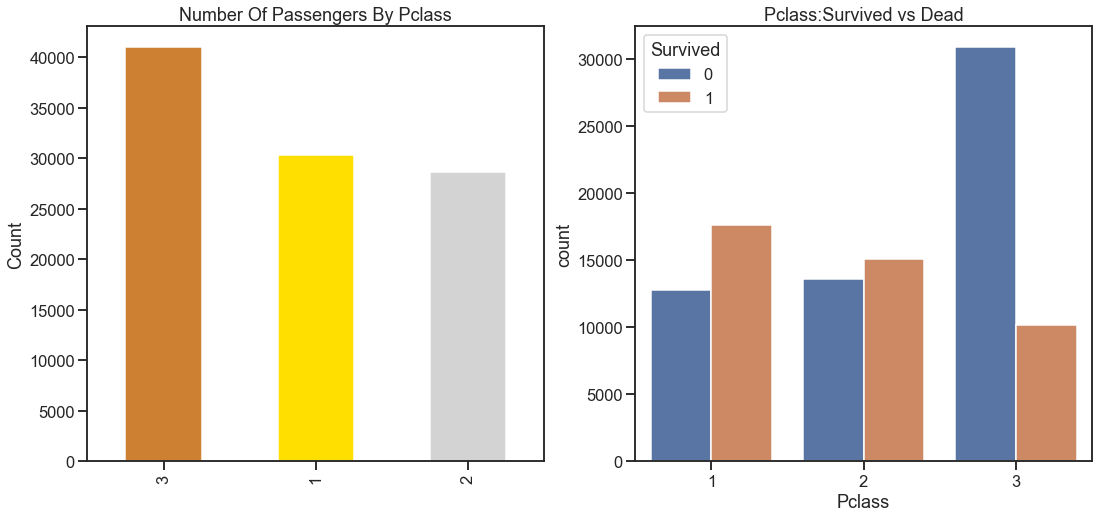

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

As we can see on graphs above if you have 3 class you probably cant survive. There is 41k passengers with 3 class but survive 10k - 25%.
On th other hand there is 58k people with 1 and 2 classes among them survived 32k which is 55%, more then twice compared to 3 class passengers.

### Lets go deeper with SEX and Pclass columns

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='Blues')

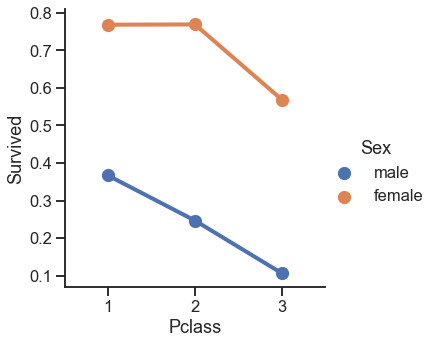

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

There is it. Now we see that we discuss in previus chapter. Dethrate at Pclass 3 much highter, even among woman.

### AGE

In [15]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 87.0 Years
Youngest Passenger was of: 0.08 Years
Average Age on the ship: 38.35547214294577 Years


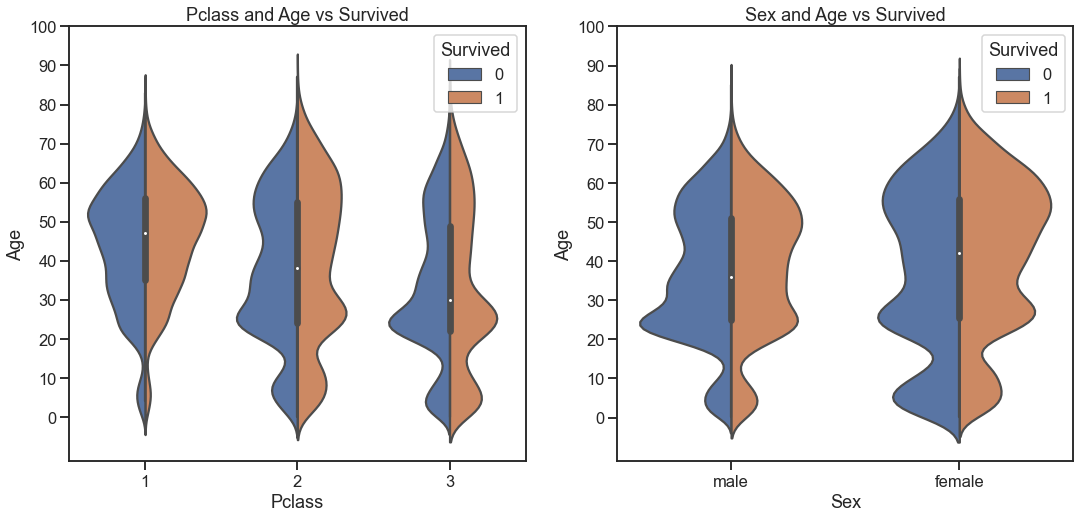

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In Pclass 1 best chance to survive have passengers aged between 50-60 years. 

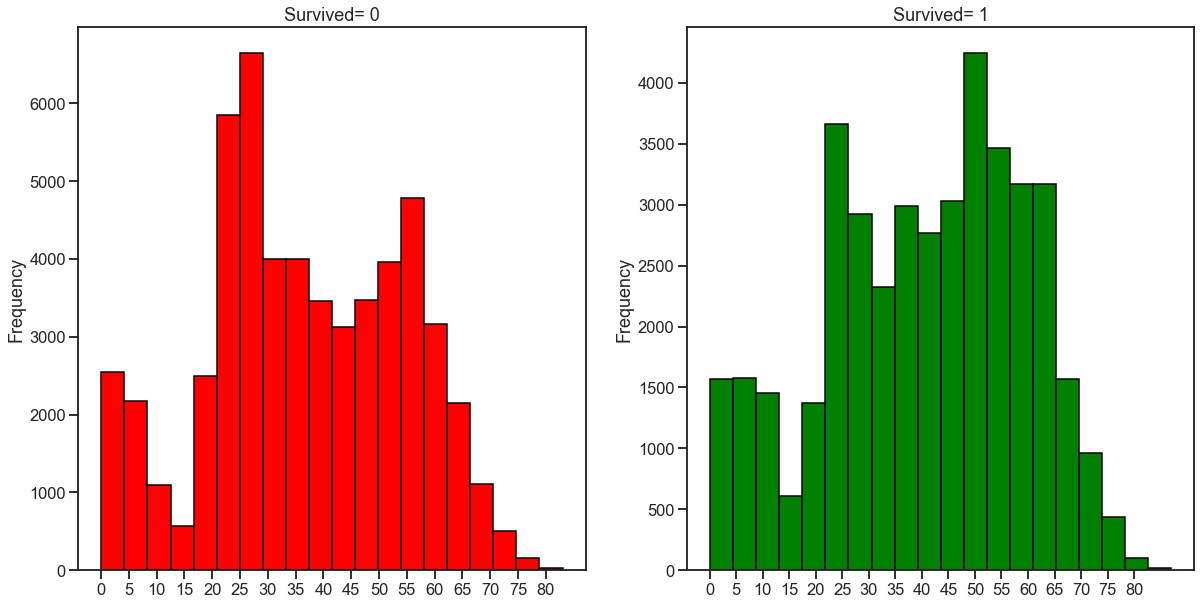

In [17]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1) The peaks of survivors are located in the age groups of 20-25 and 50-60 years.
2) In general, survival in people aged 23-65 years is extremely high.
3) the highest mortality among people from 20-30 years old, and there is also a peak in the group from 45 to 57 years old.

### Embarked

In [18]:
pd.crosstab([data.Embarked],[data.Survived],margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Embarked,,,
C,5518,16669,22187
Q,2186,3238,5424
S,49394,22745,72139
All,57098,42652,99750


Most people were taken on board in port S.

In [19]:
pd.crosstab([data.Embarked],[data.Pclass],margins=True).style.background_gradient(cmap='Blues')

Pclass,1,2,3,All
Embarked,,,,
C,11843,6156,4188,22187
Q,3751,844,829,5424
S,14635,21609,35895,72139
All,30229,28609,40912,99750


array([<AxesSubplot:ylabel='C'>, <AxesSubplot:ylabel='Q'>,
       <AxesSubplot:ylabel='S'>, <AxesSubplot:ylabel='All'>], dtype=object)

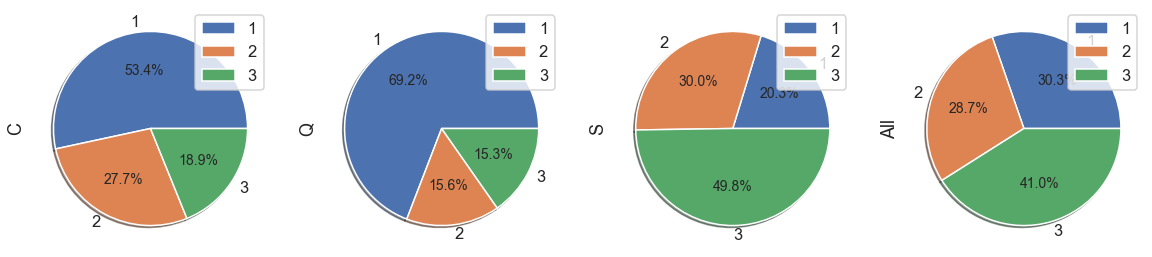

In [20]:
pd.crosstab([data.Pclass],[data.Embarked],margins=True).iloc[:-1].plot.pie(autopct='%1.1f%%',subplots=True,shadow=True)

In [21]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='Blues')

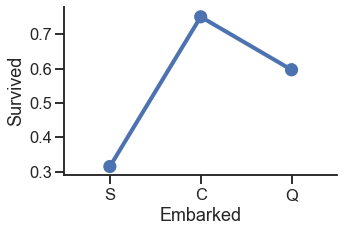

In [22]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

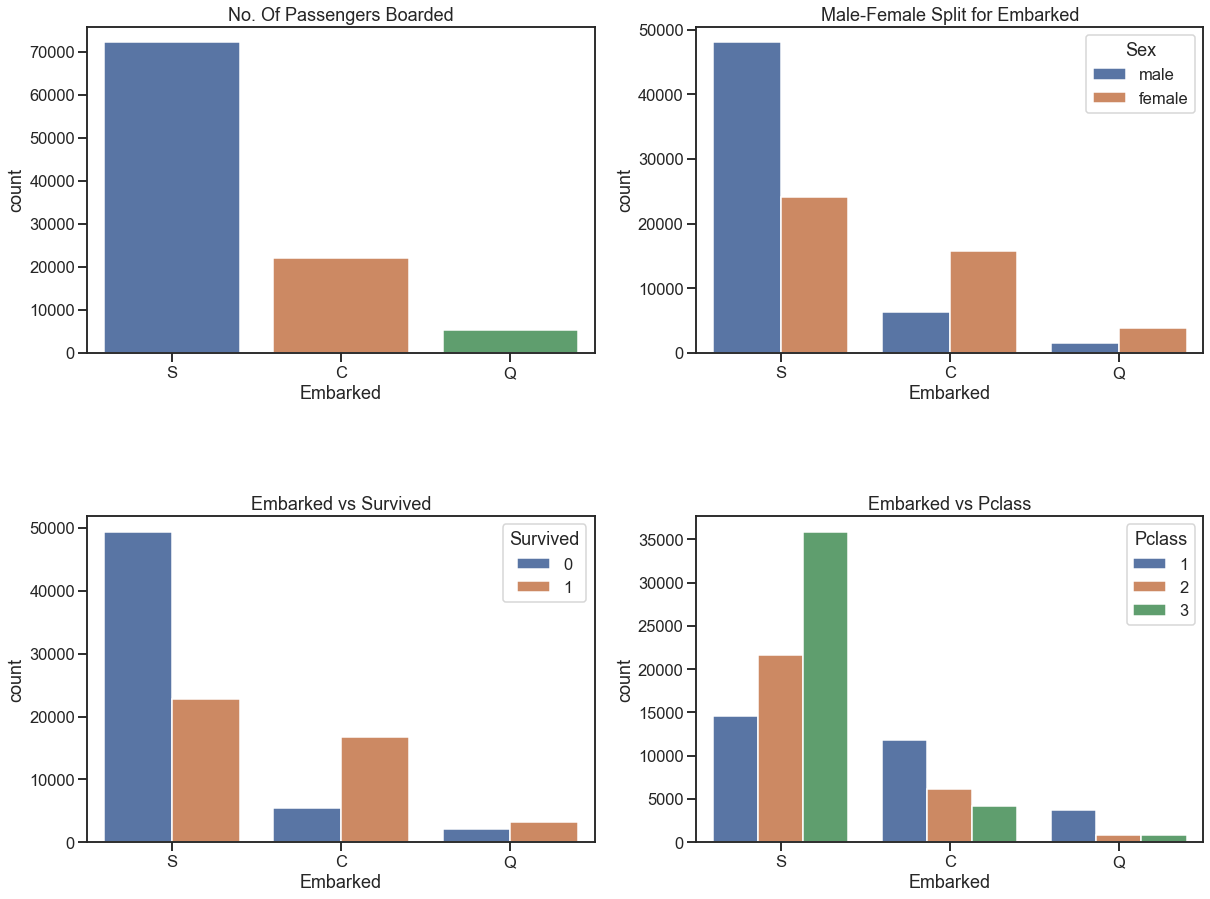

In [23]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

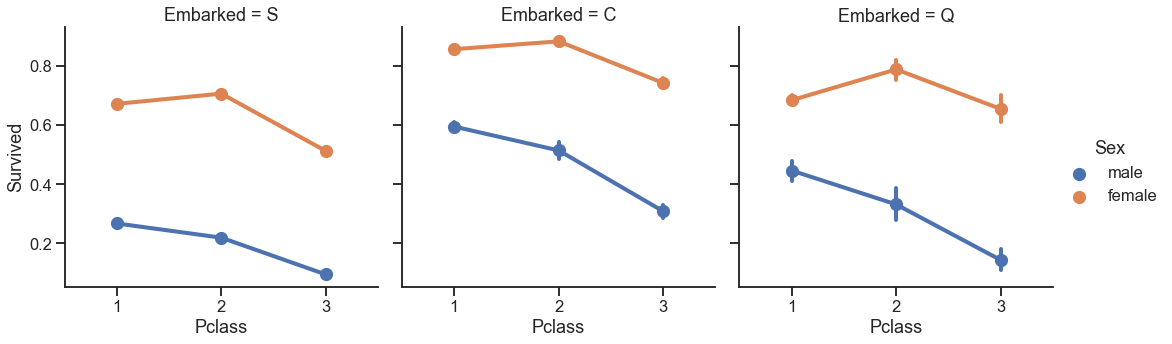

In [24]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

Port S looks to be very unlucky for Passenegers as the survival rate for both men and women is low.

### SibSp

In [25]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
SibSp,,
0,42017,31291
1,11188,8570
2,2022,1681
3,981,654
4,729,439
5,107,25
8,182,114


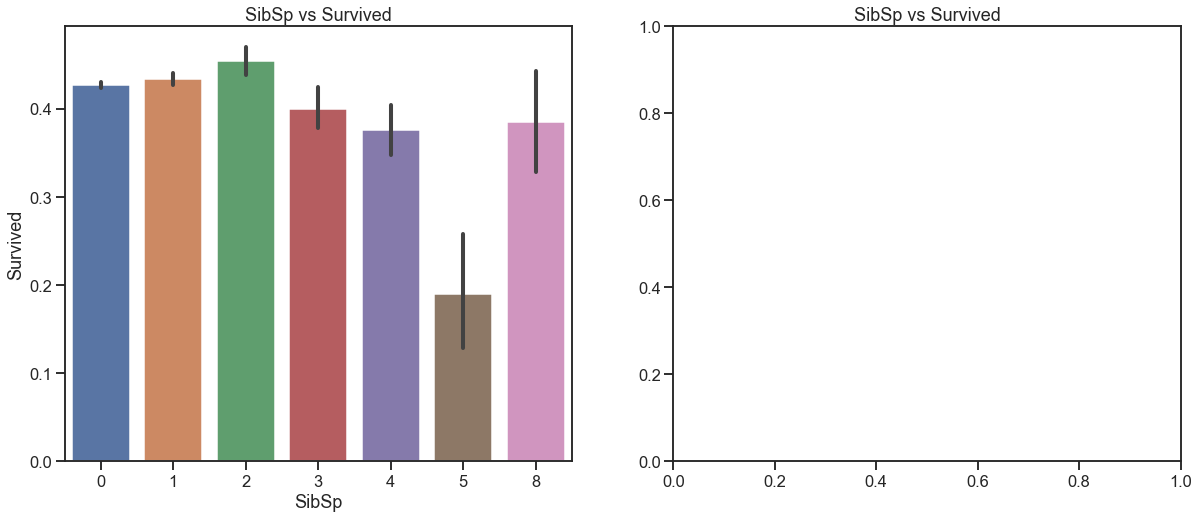

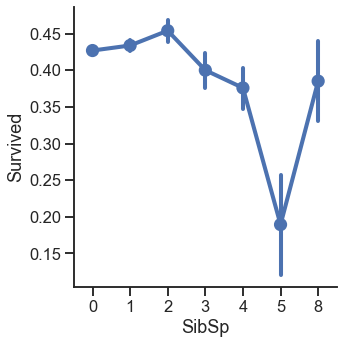

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [27]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='Blues')


Pclass,1,2,3
SibSp,,,
0,19483,22125,31700
1,8714,4283,6761
2,1368,1329,1006
3,525,293,817
4,154,483,531
5,24,40,68
8,47,126,123


The barplot and factorplot shows that if a passenger is alone or onboard with 2 siblings, he have 40% - 45% survival rate. The graph roughly decreases if the number of siblings increase.<br>
The low rate of survivability with 5 siblings is low numbers of observations.<br>
Interesting that survival with 0 siblings is lowest that with 3 siblings. If I have a family on board, I will try to save them instead of saving myself first.

### Fare

In [28]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 744.66
Lowest Fare was: 0.68
Average Fare was: 43.92933040273968


0.68 looks like free ride ! ;D

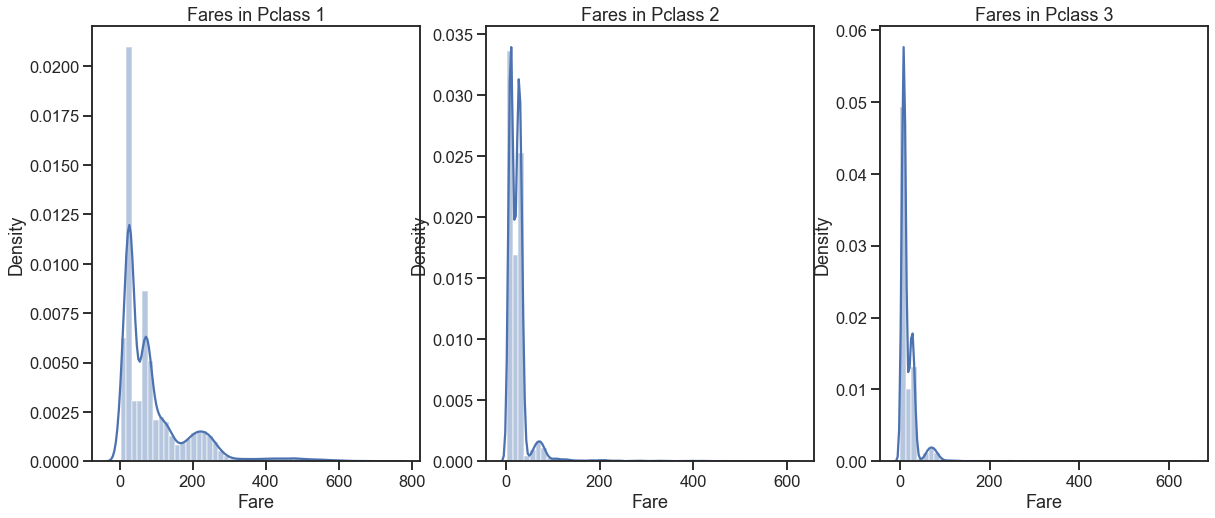

In [29]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. Its strange that fares in Pclass 2 and 3 almost same, except second peak in Pclass 2. 

# Summary

Sex: The chance of survival for women is high as compared to men.<br>

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low.<br>

Age: Passengers between age group 20 to 30 died a lot.<br>

Embarked: This is a very interesting feature. The chances of survival at C looks to be better because there embarked more % of Pclass among all passenger who embarked at C.<br>

SibSp: Seems like having siblings not important in case of surviving and its strange.<br>

So if you woman in Pclass 1 aged 25-27 or 55-57 you have good chances to survive.